# WeatherPy

In [1]:
from citipy import citipy
import numpy as np
import requests
from api_keys import api_key
import pandas as pd
import matplotlib.pyplot as plt

## Generate a Cities List

### Random a Cities List

In [2]:
# Create a set of random latitudes and Longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Identify nearest city for each combination of lat & lng
random_cities = []
for lat, lng in zip(lats, lngs):
    random_city = citipy.nearest_city(lat, lng).city_name
    if random_city not in random_cities:
        random_cities.append(random_city)

len(random_cities)

631

### Sample a Cities List which exist in OpenWeatherMap System

In [3]:
def get_weather(city, api_key):
    url = 'http://api.openweathermap.org/data/2.5/weather?'
    r = requests.get(url, params={
        'appid': api_key,
        'q': city})
    if r.status_code == 200:
        return r.json()
    else:
        return None

In [4]:
sample_cities = []
for city in random_cities:
    sample_city = get_weather(city, api_key)
    if sample_city:
        sample_cities.append(sample_city)
        
# To see if the city amount meets the requirements (500+)
len(sample_cities)

564

In [5]:
sample_cities

[{'coord': {'lon': 73.17, 'lat': 17.6},
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01d'}],
  'base': 'model',
  'main': {'temp': 297.96,
   'feels_like': 296.76,
   'temp_min': 297.96,
   'temp_max': 297.96,
   'pressure': 1015,
   'humidity': 66,
   'sea_level': 1015,
   'grnd_level': 1015},
  'wind': {'speed': 5.72, 'deg': 108},
  'clouds': {'all': 0},
  'dt': 1578279383,
  'sys': {'country': 'IN', 'sunrise': 1578274747, 'sunset': 1578314764},
  'timezone': 19800,
  'id': 1273765,
  'name': 'Dabhol',
  'cod': 200},
 {'coord': {'lon': 68.36, 'lat': 51.81},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04n'}],
  'base': 'model',
  'main': {'temp': 265.56,
   'feels_like': 260.76,
   'temp_min': 265.56,
   'temp_max': 265.56,
   'pressure': 1025,
   'humidity': 96,
   'sea_level': 1025,
   'grnd_level': 985},
  'wind': {'speed': 2.71, 'deg': 190},
  'clouds': {'all': 97},
  'dt': 157827

## Convert Raw Data to DataFrame

In [6]:
cities_weather_data = [{
        'City': dict['name'],
        'Country': dict['sys']['country'],
        'Date': dict['dt'],
        'Latitude': dict['coord']['lat'],
        'Temperature(F)': dict['main']['temp_max'],
        'Humidity(%)': dict['main']['humidity'],
        'Cloudiness(%)': dict['clouds']['all'],
        'Wind Speed(mph)': dict['wind']['speed']
    } for dict in sample_cities]

df = pd.DataFrame(cities_weather_data)

# Convert Epoch Timestamp to Readable Date Format
df['Date'] = pd.to_datetime(df['Date'], unit='s').dt.date

df.to_csv("WeatherOfCities.csv", index=False)

df.head()

,City,Country,Date,Latitude,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph)
0,Dabhol,IN,2020-01-06,17.60,297.96,66,0,5.72
1,Atbasar,KZ,2020-01-06,51.81,265.56,96,97,2.71
2,Rikitea,PF,2020-01-06,-23.12,297.75,76,52,7.17
3,Punta Arenas,CL,2020-01-06,-53.16,281.15,61,40,5.70
4,Daoukro,CI,2020-01-06,7.06,291.80,38,0,0.50


## Plotting the Data

### Latitude vs. Temperature Plot

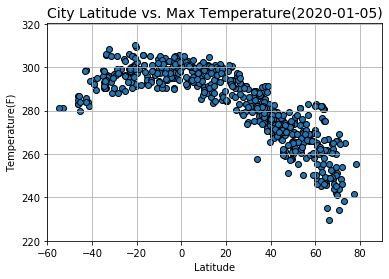

In [7]:
x = df['Latitude']
y = df['Temperature(F)']
plt.scatter(x, y, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.title('City Latitude vs. Max Temperature(2020-01-05)', fontsize=14)
plt.xlim(-60, 90)
plt.ylim(220, max(y) + 10)
plt.grid(axis='both', linestyle='-')
plt.rcParams['figure.figsize'] = [6,6]
plt.savefig('Fig1 Lat vs Temperature Plot.png')
plt.show()

### Latitude vs. Humidity Plot

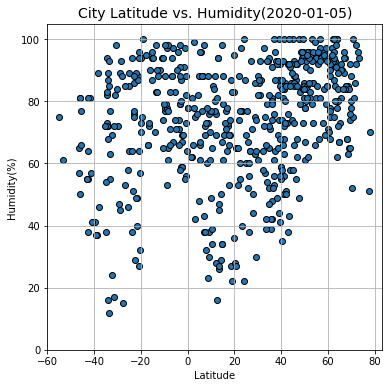

In [8]:
x = df['Latitude']
y = df['Humidity(%)']
plt.scatter(x, y, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity(2020-01-05)', fontsize=14)
plt.xlim(-60, max(x) + 5)
plt.ylim(0,max(y) + 5)
plt.grid(axis='both', linestyle='-')
plt.rcParams['figure.figsize'] = [6,6]
plt.savefig('Fig2 Lat vs Humidity Plot.png')
plt.show()

### Latitude vs. Cloudiness Plot

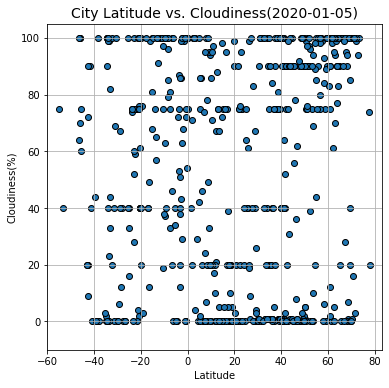

In [9]:
x = df['Latitude']
y = df['Cloudiness(%)']
plt.scatter(x, y, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness(2020-01-05)', fontsize=14)
plt.xlim(-60, max(x) + 5)
plt.ylim(-10,max(y) + 5)
plt.grid(axis='both', linestyle='-')
plt.rcParams['figure.figsize'] = [6,6]
plt.savefig('Fig3 Lat vs Cloudiness Plot.png')
plt.show()

### Latitude vs. Wind Speed Plot

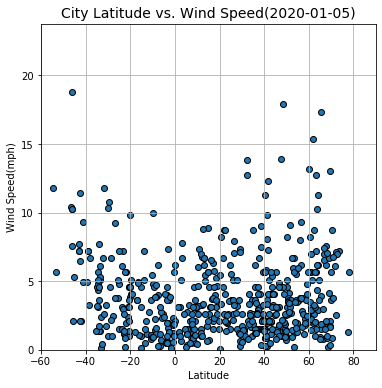

In [10]:
x = df['Latitude']
y = df['Wind Speed(mph)']
plt.scatter(x, y, edgecolor='black')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed(2020-01-05)', fontsize=14)
plt.xlim(-60, 90)
plt.ylim(0, max(y) + 5)
plt.grid(axis='both', linestyle='-')
plt.rcParams['figure.figsize'] = [6,6]
plt.savefig('Fig4 Lat vs Wind Speed Plot.png')
plt.show()

## First Observable Trend
### The Fig 1 (Lat vs Temperature Plot.png) illustrates a curvilinear relationship between the variable "Latitude" and the variable "Temperature". 
### City temperature increases along with its latitude rising from -60 to -20, remains steady and peaks at around 300F with the latitude ranges of -20 and 20, then begins to decrease through the positive latitudes where cities start locating away from the latitude of 0, the Equator, higher latitude and lower temperature.

## Second Observable Trend
### The Fig 2 (Lat vs Humidity Plot.png) indicates a weak association between the variable "Latitude" and the varible "Humidity". 
### Furthermore, the correlation between city latitude and humidity is positive although the correlation is strongly affected by a few outliers. 


## Third Observation
### The Fig 3 (Lat vs Cloudiness Plot.png) shows that no relationship is demonstrated between the variables "City Latitude" and "Cloudiness".

### The Fig 4 (Lat vs Wind Speed Plot.png)  shows that no relationship exists between the variables "City Latitude" and "Wind Speed".